## Simple RNN
- Numpy 배열로 만든 시계열 예측 문제 만들기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
t = np.arange(0, 1000)
x = np.sin(0.02 * t) + np.random.rand(1000)
train, test = x[0:800], x[800:1000]

In [3]:
# 데이터 전처리

def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

train = np.append(train, np.repeat(train[-1], 4))
test = np.append(test, np.repeat(test[-1], 4))

train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [4]:
# 모델 선언하기

model = Sequential()
# units: 몇번을 순환할 것인지(손잡이 갯수), input: 과거 4개의 데이터를 집어넣어서 미래 1개를 예측한다
model.add(SimpleRNN(units=32, input_shape=(1, 4), activation='relu'))
# FC layer 부분: flatten이 없는 이유는 텐서형태가 아니여서 (이미 2차원이기에)
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1457 (5.69 KB)
Trainable params: 1457 (5.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history=model.fit(train_x, train_y, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 1ms/step - loss: 1.4053 - mse: 1.4053
Epoch 2/10
25/25 [==============================] - 0s 886us/step - loss: 0.2969 - mse: 0.2969
Epoch 3/10
25/25 [==============================] - 0s 875us/step - loss: 0.1245 - mse: 0.1245
Epoch 4/10
25/25 [==============================] - 0s 875us/step - loss: 0.1165 - mse: 0.1165
Epoch 5/10
25/25 [==============================] - 0s 875us/step - loss: 0.1128 - mse: 0.1128
Epoch 6/10
25/25 [==============================] - 0s 792us/step - loss: 0.1097 - mse: 0.1097
Epoch 7/10
25/25 [==============================] - 0s 804us/step - loss: 0.1070 - mse: 0.1070
Epoch 8/10
25/25 [==============================] - 0s 792us/step - loss: 0.1053 - mse: 0.1053
Epoch 9/10
25/25 [==============================] - 0s 750us/step - loss: 0.1038 - mse: 0.1038
Epoch 10/10
25/25 [==============================] - 0s 750us/step - loss: 0.1032 - mse: 0.1032


In [7]:
pre = model.predict(test_x)

7/7 [==============================] - 0s 837us/step


In [8]:
pre

array([[ 0.49185598],
       [ 0.35506237],
       [ 0.40640908],
       [ 0.37691164],
       [ 0.4956944 ],
       [ 0.49730098],
       [ 0.44640946],
       [ 0.26776588],
       [ 0.10046888],
       [-0.10707726],
       [-0.13968976],
       [-0.1594904 ],
       [-0.13743703],
       [-0.11124288],
       [-0.24223877],
       [-0.19454451],
       [-0.20494545],
       [-0.18637466],
       [-0.11994864],
       [-0.09699537],
       [-0.15941049],
       [-0.24959327],
       [-0.3133359 ],
       [-0.27921426],
       [-0.23710094],
       [-0.28049773],
       [-0.22640415],
       [-0.23369564],
       [-0.20584793],
       [-0.28646785],
       [-0.22923855],
       [-0.2694919 ],
       [-0.3630104 ],
       [-0.2636693 ],
       [-0.17475162],
       [-0.22920115],
       [-0.04883139],
       [-0.11229496],
       [-0.23988922],
       [-0.2683797 ],
       [-0.40088516],
       [-0.26996458],
       [-0.24766801],
       [-0.38342035],
       [-0.36516726],
       [-0

In [9]:
print(test_x)

[[[ 6.33450834e-01  2.59158674e-01  4.59977829e-01  3.51958006e-01]]

 [[ 2.59158674e-01  4.59977829e-01  3.51958006e-01  4.14163032e-02]]

 [[ 4.59977829e-01  3.51958006e-01  4.14163032e-02  4.50612726e-01]]

 [[ 3.51958006e-01  4.14163032e-02  4.50612726e-01  4.59289562e-01]]

 [[ 4.14163032e-02  4.50612726e-01  4.59289562e-01  5.66369279e-01]]

 [[ 4.50612726e-01  4.59289562e-01  5.66369279e-01  1.86846893e-01]]

 [[ 4.59289562e-01  5.66369279e-01  1.86846893e-01  1.20196205e-01]]

 [[ 5.66369279e-01  1.86846893e-01  1.20196205e-01  3.82674885e-03]]

 [[ 1.86846893e-01  1.20196205e-01  3.82674885e-03 -5.91406036e-02]]

 [[ 1.20196205e-01  3.82674885e-03 -5.91406036e-02 -4.27957472e-01]]

 [[ 3.82674885e-03 -5.91406036e-02 -4.27957472e-01 -7.04269314e-02]]

 [[-5.91406036e-02 -4.27957472e-01 -7.04269314e-02 -3.50532749e-01]]

 [[-4.27957472e-01 -7.04269314e-02 -3.50532749e-01  1.59672810e-01]]

 [[-7.04269314e-02 -3.50532749e-01  1.59672810e-01 -9.66571279e-02]]

 [[-3.50532749e-01  

# 

## 주가 예측

In [10]:
!pip install finance-datareader

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#### 데이터 확인
- 삼성전자 액면분할 상장일이던 2018년 5월 4일부터 2020년 1월 22일까지의 OHLVC(종가-고가-저가-거래량-종가) 데이터 사용

In [42]:
# 데이터 확인
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22') # '005930'은 삼성전자 주가의 코드번호
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-16,59100,60700,59000,60700,14381774,0.028814
2020-01-17,61900,62000,61000,61300,16025661,0.009885
2020-01-20,62000,62800,61700,62400,12528855,0.017945
2020-01-21,62000,62400,61200,61400,11142693,-0.016026
2020-01-22,60500,62600,60400,62300,15339565,0.014658


In [32]:
# 데이터 전처리
dfx = df[['Open', 'High', 'Low', 'Volume', 'Close']]

for col in dfx.columns:
    scaler = MinMaxScaler()
    dfx[col] = scaler.fit_transform(dfx[[col]])
dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]


x = dfx.values.tolist()
y = dfy.values.tolist()


C:\Users\leah5\AppData\Local\Temp\ipykernel_11468\3152341067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[col] = scaler.fit_transform(dfx[[col]])
C:\Users\leah5\AppData\Local\Temp\ipykernel_11468\3152341067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[col] = scaler.fit_transform(dfx[[col]])
C:\Users\leah5\AppData\Local\Temp\ipykernel_11468\3152341067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## input data set
- 5일 동안의 OHLVC 데이터로 다음 날의 종가를 예측
    - RNN에 넣으면 RNN은 총 5번 이루어짐
    - x0 부터 x4까지 입력을 받고 다음 날의 종가를 예측

In [33]:
# 데이터를 5일씩 한 묶음으로 묶는 코드 (ex: 2023.09.13~2023.09.17/ 2023.09.14~2023.09.18/ ...)
window_size = 5
data_x, data_y = [], []

for i in range(len(y) - window_size):
    _x = x[i:i+window_size]
    _y = y[i+window_size]
    data_x.append(_x)
    data_y.append(_y)

In [34]:
train_size = int(len(data_y) * 0.8)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

# 5개씩의 묶음이 총 332개가 있다는 뜻 (중복있음)
# ex) 1,2,3,4,5일로 6일 예측/ 2,3,4,5,6일로 7일 예측/ ...

훈련 데이터의 크기 : (332, 5, 4) (332, 1)
테스트 데이터의 크기 : (84, 5, 4) (84, 1)


In [35]:
# LSTM 모델 선언
model = Sequential()
model.add(LSTM(units=20,activation='tanh',input_shape=(5,4)))
model.add(Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error')

In [36]:
# 모델 훈련
model.fit(train_x, train_y, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 13/100
11/11 [=================

3/3 [==============================] - 0s 2ms/step


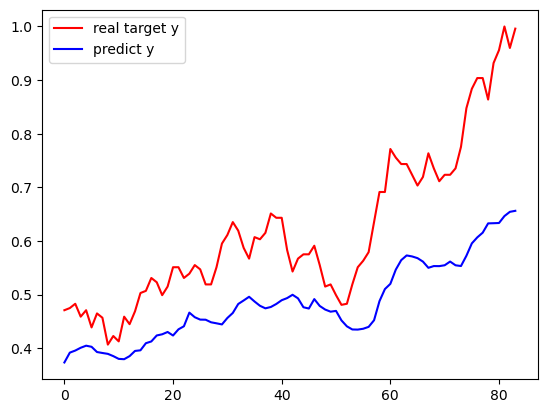

In [37]:
pred_y = model.predict(test_x)

plt.figure()
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()

In [38]:
# 레이어 추가 후 재학습
model2 = Sequential()
model2.add(LSTM(20,activation='relu',return_sequences=True, input_shape=(5,4))) # return_sequences 과거의 데이터를 받아올꺼니? 라는 옵션
model2.add(LSTM(units=40, activation='relu',return_sequences=True)) # units: 레이어가 내보낼 아웃풋 갯수
model2.add(LSTM(units=20, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')


In [39]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 20)             2000      
                                                                 
 lstm_4 (LSTM)               (None, 5, 40)             9760      
                                                                 
 lstm_5 (LSTM)               (None, 20)                4880      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 16661 (65.08 KB)
Trainable params: 16661 (65.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model2.fit(train_x, train_y, epochs=100,)

Epoch 1/100
11/11 [==============================] - 2s 3ms/step - loss: 0.0946
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 13/100
11/11 [=================

3/3 [==============================] - 0s 2ms/step


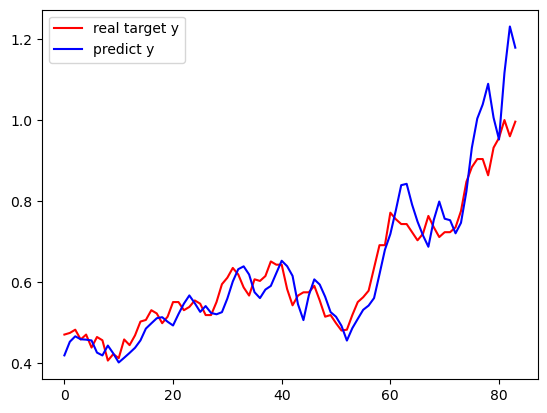

In [41]:
pred_y = model2.predict(test_x)

plt.figure()
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()

## 오일 가격 예측하기

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split


In [55]:
# 데이터 불러오기
df = pd.read_csv("./BrentOilPrices.csv")
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [70]:
# 데이터 전처리
t = len(df['Date'].values)
x = df['Price'].values
# train, test = train_test_split(x, test_size=0.2, random_state=123)
train, test = x[0:7208], x[7208:9011]

In [69]:
t*0.8

7208.8

In [72]:
def convert_to_matrix(data, step):
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step  
        x.append(data[i:d])
        y.append(data[d])
    return np.array(x), np.array(y)

train = np.append(train, np.repeat(train[-1], 4)) # 마지막 데이터에서 더 나아가기 위해 더미 데이터를 복제
test = np.append(test, np.repeat(test[-1], 4))

train_x, train_y = convert_to_matrix(train, 4)
test_x, test_y = convert_to_matrix(test, 4)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [73]:
print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (7212, 1, 4) (7212,)
테스트 데이터의 크기 : (1807, 1, 4) (1807,)


In [74]:
# 모델 선언하기
model2 = Sequential()
model2.add(LSTM(20,activation='relu',return_sequences=True, input_shape=(1,4)))
model2.add(LSTM(units=40, activation='relu',return_sequences=True))
model2.add(LSTM(units=20, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 20)             2000      
                                                                 
 lstm_13 (LSTM)              (None, 1, 40)             9760      
                                                                 
 lstm_14 (LSTM)              (None, 20)                4880      
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 16661 (65.08 KB)
Trainable params: 16661 (65.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
history=model2.fit(train_x, train_y, epochs=10)

Epoch 1/10
226/226 [==============================] - 2s 1ms/step - loss: 703.3187
Epoch 2/10
226/226 [==============================] - 0s 1ms/step - loss: 2.2360
Epoch 3/10
226/226 [==============================] - 0s 1ms/step - loss: 2.1605
Epoch 4/10
226/226 [==============================] - 0s 1ms/step - loss: 2.1346
Epoch 5/10
226/226 [==============================] - 0s 1ms/step - loss: 1.8792
Epoch 6/10
226/226 [==============================] - 0s 1ms/step - loss: 1.8747
Epoch 7/10
226/226 [==============================] - 0s 1ms/step - loss: 1.7247
Epoch 8/10
226/226 [==============================] - 0s 1ms/step - loss: 1.6668
Epoch 9/10
226/226 [==============================] - 0s 1ms/step - loss: 1.9841
Epoch 10/10
226/226 [==============================] - 0s 1ms/step - loss: 1.7807


57/57 [==============================] - 0s 831us/step


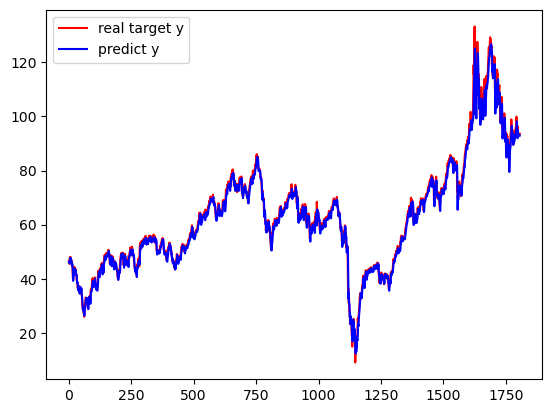

In [77]:
pred_y = model2.predict(test_x)

plt.figure()
plt.plot(test_y, color='red', label='real target y')
plt.plot(pred_y, color='blue', label='predict y')
plt.legend()
plt.show()